In [1]:
%matplotlib notebook

We can note the potentials of a single point charge, moving with some velocity $v$ in the x-direction as a four-vector (with relativistic corrections):

$$A_{\mu} = (\phi , \mathbf{A})$$

Where,

$$\phi = \frac{1}{4\pi \epsilon_{0}\sqrt{1-v^{2}} }\frac{q}{\sqrt{\frac{(x-vt)^{2}}{1-v^{2}}+y^{2}+z^{2}}}$$
$$A_{x} = \frac{1}{4\pi \epsilon_{0}\sqrt{1-v^{2}} }\frac{qv}{\sqrt{\frac{(x-vt)^{2}}{1-v^{2}}+y^{2}+z^{2}}}$$
$ $
$$A_{y} = A_{z} = 0 $$

From these potentials, the fields follow readily,

$$\mathbf{E} = -\mathbf{\nabla}\phi - \frac{\partial }{\partial t}\mathbf{A}$$

$$\mathbf{B} = \nabla \times\mathbf{A}$$

Yielding, 

$$\mathbf{E} = \frac{q}{4\pi \epsilon_{0}\sqrt{1-v^{2}} }\frac{1}{\left (  \frac{(x-vt)^{2}}{1-v^{2}}+y^{2}+z^{2}\right )^{\frac{3}{2}}}\left ( (x-vt) 
\hat{x},\, y\hat{y}, \, z\hat{z}\right )$$
$ $
$$\mathbf{B} = v(0,\, -E_{z}, \, E_{y})$$

The magnetic field is relatively trivial, so this code attempts to display the resulting electric field in three different manners. The code generates the original magnetic and electric fields given by electrostatics. Then, these equations are adjusted using a small variation on the previous formalism.

<IPython.core.display.Javascript object>


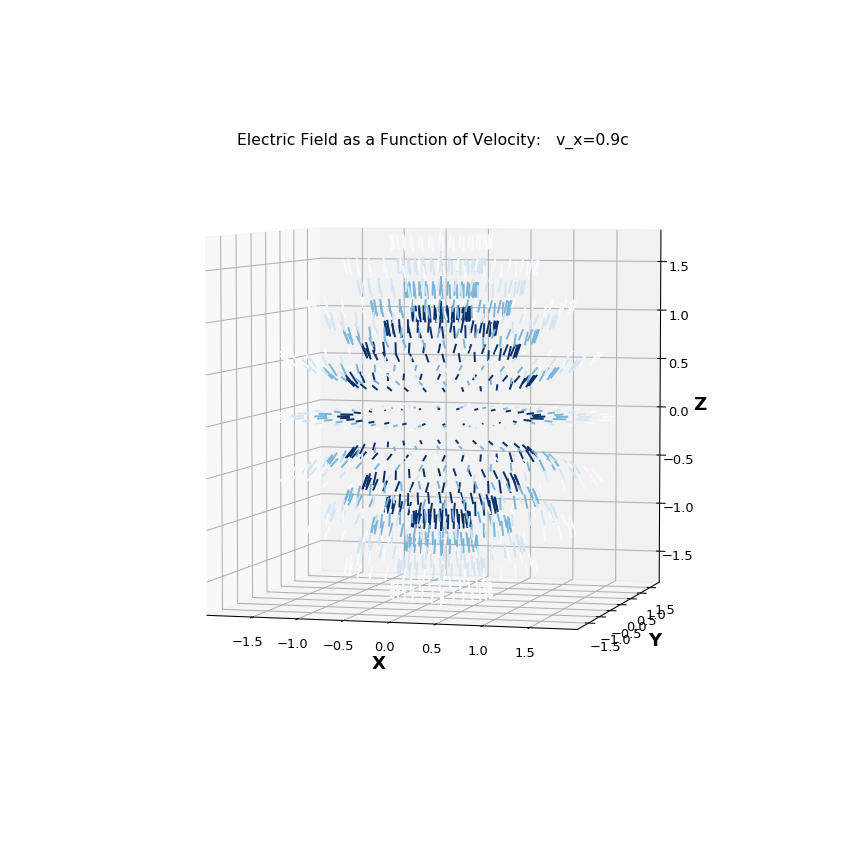

In [38]:
# Change the x-velocity of the charged particle to some fraction of c
vel = 0.9


from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

norm = Normalize(vmin=0.2)
colormap = cm.Blues

fig = plt.figure(figsize=[9,9])
ax = fig.gca(projection='3d')

# Make the grid
theta = np.arange(0,2*np.pi,np.pi/10)
phi = np.arange(0,np.pi,np.pi/15)
r = np.arange(1,2,0.25)


g = 1/((1-(vel**2))**0.5)

P = []
E = []
B = []

ET = []
BT = []

for i in r:
    for e in phi:
        for f in theta:
            
            P.append(  [i*np.sin(f)*np.cos(e),  i*np.sin(f)*np.sin(e),  i*np.cos(f)])
            
            ex=round(np.sin(f)*np.cos(e),7)
            ey=round(np.sin(f)*np.sin(e),7)
            ez=round(np.cos(f),7)
            r2 = (1/(i**2))
            
            E.append([ex, ey, ez, r2])
            
            bx=0
            by=vel*np.cos(f)
            bz=-vel*np.sin(f)*np.sin(e)
            
            B.append([bx,by,bz, r2])
            
            
            ET.append( [ex, (ey - vel*bz)*g, (ez + vel*by)*g])
            BT.append( [bx, (by + vel*ez)*g, (bz - vel*ey)*g])
                     
# Make the direction data for the arrows

colors = [i[3] for i in E]

norm.autoscale(colors)
ax.quiver([i[0] for i in P], [i[1] for i in P], [i[2] for i in P],\
          [i[0] for i in ET], [i[1] for i in ET], [i[2] for i in ET], length = 0.15, \
          color=colormap(norm(colors)), normalize=True, arrow_length_ratio=0)
ax.set_ylabel('Y',fontsize=14, fontweight='bold')
ax.set_xlabel('X',fontsize=14, fontweight='bold')
ax.set_zlabel('Z',fontsize=14, fontweight='bold')
ax.set_title('Electric Field as a Function of Velocity:   v_x='+str(vel)+'c')

plt.show()

<IPython.core.display.Javascript object>


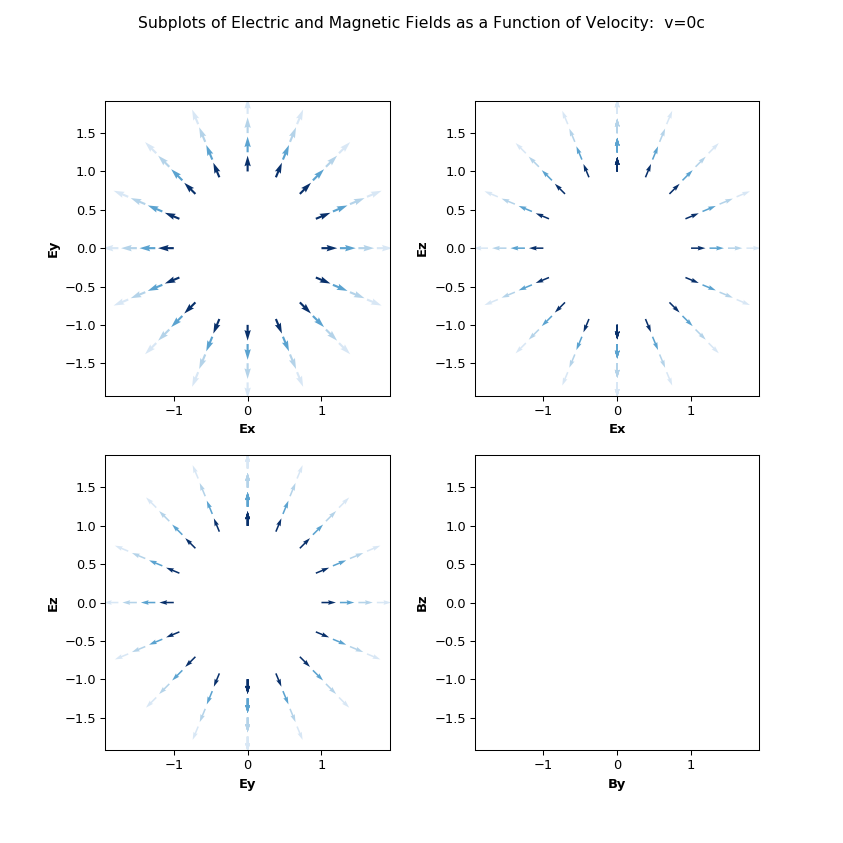

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

vel = 0
norm = Normalize(vmin=0.2)
colormap = cm.Blues

# Make the grid
theta = np.arange(0,2*np.pi,np.pi/8)
phi = np.arange(0,np.pi,np.pi/8)
r = np.arange(1,2,0.25)


g = 1/((1-(vel**2))**0.5)

P = []
E = []
B = []

ET = []
BT = []

for i in r:
    for e in phi:
        for f in theta:
            
            P.append(  [round(i*np.sin(f)*np.cos(e),7),  round(i*np.sin(f)*np.sin(e),7),  round(i*np.cos(f),7)])
            
            ex=round(np.sin(f)*np.cos(e),7)
            ey=round(np.sin(f)*np.sin(e),7)
            ez=round(np.cos(f),7)
            r2 = (1/(i**2))
            
            E.append([ex, ey, ez, r2])
            
            bx=0
            by=round(vel*np.cos(f),7)
            bz=round(-vel*np.sin(f)*np.sin(e),7)
            
            B.append([bx,by,bz, r2])
            
            
            ET.append( [ex, (ey - vel*bz)*g, (ez + vel*by)*g])
            BT.append( [bx, (by + vel*ez)*g, (bz - vel*ey)*g])

fig1, axs = plt.subplots(2, 2, figsize=(9,9))

locs = []
vals = []
mags = []
for p in P:
    if p[2] == 0:
        locs.append(p)
        vals.append(ET[P.index(p)])
        mags.append(E[P.index(p)][3])

axs[0, 0].quiver([i[0] for i in locs], [i[1] for i in locs],\
          [i[0] for i in vals], [i[1] for i in vals],\
                 color=colormap(norm(mags)))
axs[0, 0].set_xlabel('Ex', fontweight='bold')
axs[0, 0].set_ylabel('Ey', fontweight='bold')

locs = []
vals = []
mags = []
for p in P:
    if p[1] == 0:
        locs.append(p)
        vals.append(ET[P.index(p)])
        mags.append(E[P.index(p)][3])

axs[0, 1].quiver([i[0] for i in locs], [i[2] for i in locs],\
          [i[0] for i in vals], [i[2] for i in vals],\
                 color=colormap(norm(mags)))
axs[0, 1].set_xlabel('Ex', fontweight='bold')
axs[0, 1].set_ylabel('Ez', fontweight='bold')


locs = []
vals = []
mags = []
for p in P:
    if p[0] == 0:
        locs.append(p)
        vals.append(ET[P.index(p)])
        mags.append(E[P.index(p)][3])

axs[1, 0].quiver([i[1] for i in locs], [i[2] for i in locs],\
          [i[1] for i in vals], [i[2] for i in vals],\
                 color=colormap(norm(mags)))

axs[1, 0].set_xlabel('Ey', fontweight='bold')
axs[1, 0].set_ylabel('Ez', fontweight='bold')

locs = []
vals = []
mags = []
for p in P:
    if p[0] == 0:
        locs.append(p)
        vals.append(BT[P.index(p)])
        mags.append(B[P.index(p)][3])

axs[1, 1].quiver([i[1] for i in locs], [i[2] for i in locs],\
          [i[1] for i in vals], [i[2] for i in vals],\
                 color=colormap(norm(mags)))

axs[1, 1].set_xlabel('By', fontweight='bold')
axs[1, 1].set_ylabel('Bz', fontweight='bold')
fig1.suptitle('Subplots of Electric and Magnetic Fields as a Function of Velocity:  v='+str(vel)+'c')
plt.subplots_adjust(wspace=0.3)


<IPython.core.display.Javascript object>


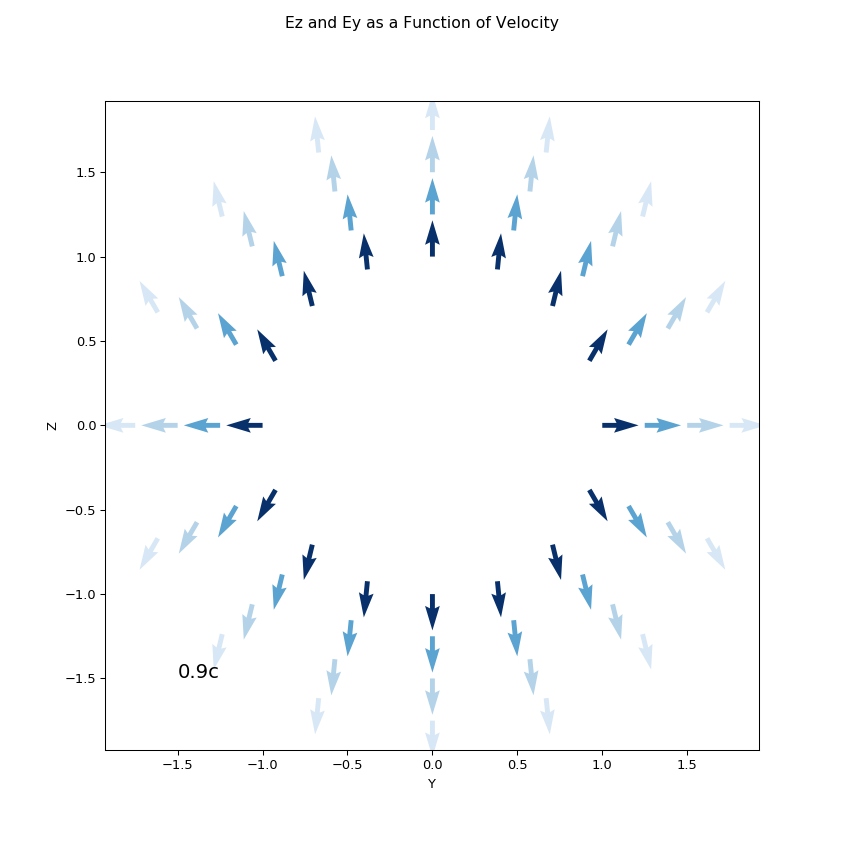

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

vel = 0.1
norm = Normalize(vmin=0.2)
colormap = cm.Blues

# Make the grid
theta = np.arange(0,2*np.pi,np.pi/8)
phi = np.arange(0,np.pi,np.pi/8)
r = np.arange(1,2,0.25)

layers = []

A = np.arange(0,0.99,0.01)
B = np.arange(.9900,0.9999, 0.0009)
C = np.concatenate((A,B))

for vel in A:

    g = 1/((1-(vel**2))**0.5)

    P = []
    E = []
    B = []

    ET = []
    BT = []


    for i in r:
        for e in phi:
            for f in theta:

                P.append(  [round(i*np.sin(f)*np.cos(e),7),  round(i*np.sin(f)*np.sin(e),7),  round(i*np.cos(f),7)])

                ex=round(np.sin(f)*np.cos(e),7)
                ey=round(np.sin(f)*np.sin(e),7)
                ez=round(np.cos(f),7)
                r2 = (1/(i**2))

                E.append([ex, ey, ez, r2])

                bx=0
                by=round(vel*np.cos(f),7)
                bz=round(-vel*np.sin(f)*np.sin(e),7)

                B.append([bx,by,bz, r2])


                ET.append( [ex, (ey - vel*bz)*g, (ez + vel*by)*g])
                BT.append( [bx, (by + vel*ez)*g, (bz - vel*ey)*g])
            

    locs = []
    vals = []
    mags = []
    for p in P:
        if p[2] == 0:
            locs.append(p)
            val = ET[P.index(p)]
            l = ((val[0]**2 + val[1]**2)**0.5)
            val = [val[0]/l, val[1]/l, 0]
            vals.append(val)
            mags.append(E[P.index(p)][3])
    layers.append([[i[0] for i in vals], [i[1] for i in vals]])

            
fig = plt.figure(figsize=(9,9))
fig.suptitle('Ez and Ey as a Function of Velocity')
ax1 = fig.add_subplot(1, 1, 1)

quivers = ax1.quiver([i[0] for i in locs], [i[1] for i in locs], 
                     layers[0][0], layers[0][1], color=colormap(norm(mags))) 

time_text = ax1.text(-1.5, -1.5, '', fontsize=15)

ax1.set_ylabel('Z')
ax1.set_xlabel('Y')

# Essentially a meshgrid


def solution(i):
    quivers.set_UVC(layers[i][0], layers[i][1])
    time_text.set_text(str(round(C[i], 4))+'c')
#     norm.autoscale(vectors[i][2].flatten())
#     colorupdate = colormap(norm(vectors[i][2].flatten()))
#     quivers.set_color(colorupdate)
    
anim = FuncAnimation(fig, solution, frames=len(layers), interval=80, blit=False)

plt.show()